In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10, mnist
from keras import layers 
from keras.layers import Dense, Reshape, Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Activation
from keras import Sequential
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard,ReduceLROnPlateau
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import load_model



Using TensorFlow backend.


In [3]:
#Loading the Datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 307s 2us/step


In [0]:
x_train_cifar = x_train
x_test_cifar = x_test
y_train_cifar = y_train
y_test_cifar = y_test

In [5]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
x_train_cifar = x_train_cifar.astype('float32')
x_test_cifar = x_test_cifar.astype('float32')
x_train_cifar /= 255+
x_test_cifar /= 255

In [0]:
#Converting the labebels to onehot 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train_cifar = keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar = keras.utils.to_categorical(y_test_cifar, 10)

In [0]:
#Callbacks 
callbacks_model1 = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=0),     
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)]

Basic Feed Forward Nueral Netwok with 20 epochs and 128 batch size 

In [14]:
#Sample Model 
model8 = Sequential()
model8.add(Dense(1024, activation='relu', input_shape=(3072,)))
model8.add(Dense(512, activation='relu'))
#model8.add(Dense(256, activation='relu'))
model8.add(Dense(128, activation='relu'))
model8.add(Dense(64, activation='relu'))
model8.add(Dense(10, activation='softmax'))
model8.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model8.summary()
history8 = model8.fit(x_train,y_train,epochs=20,batch_size=128,validation_split = 0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 3,746,122
Trainable params: 3,746,122
Non-trainable params: 0
_________________________________________________________________
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 31s 684us/step - loss: 2.

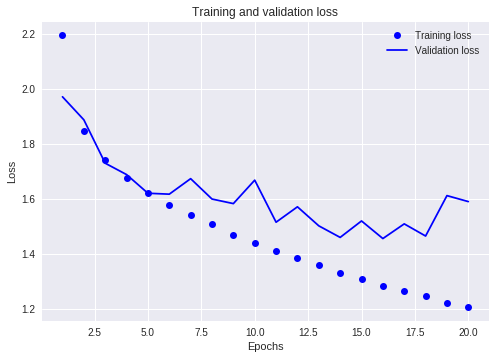

In [15]:
loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model8.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 351us/step


[1.5783538208007812, 0.4922]

 Keras model with 5 hidden layers, 100 epochs, 32 batch size

In [8]:
#Sample Model 
model6 = Sequential()
model6.add(Dense(1024, activation='relu', input_shape=(3072,)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(10, activation='softmax'))
model6.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model6.summary()
history6 = model6.fit(x_train,y_train,epochs=100,batch_size=32,validation_split = 0.1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 3,844,682
Trainable params: 3,844,682
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Model Evaluation
model6.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 320us/step


[2.170570407485962, 0.3671]

Same Model configuration with addition of callbacks which makes model to learn more by reduce learning rate on plateau with 0.1 factor

In [12]:
#The above sample Model with call backs
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split = 0.1, callbacks = callbacks_model1 )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 3,844,682
Trainable params: 3,844,682
Non-trainable params: 0
_________________________________________________________________


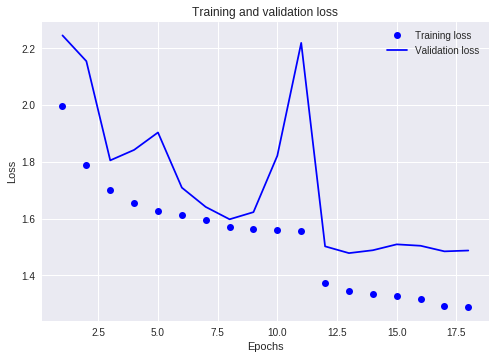

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
#Model Evaluation
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 84us/step


[1.4550952840805054, 0.5018]

Adding dropouts of 10% to the same above configured model

In [24]:
model1 = Sequential()
model1.add(Dense(3072, activation = 'relu', input_shape  = (3072,)))
model1.add(Dropout(0.1))
model1.add(Dense(768, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(512, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(256, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))
opt_model = optimizers.Adam(lr=1e-4)
model1.compile(optimizer=opt_model,loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()
history1 = model1.fit(x_train, y_train, epochs=100, batch_size=32, validation_split = 0.1, callbacks = callbacks_model1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dropout_14 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 768)               2360064   
_________________________________________________________________
dropout_15 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               393728    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
__________

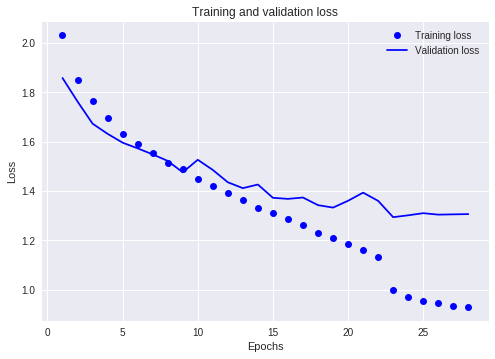

In [25]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model1.evaluate(x_test,y_test)

10000/10000 [==============================] - 9s 909us/step


[1.3265246658325196, 0.558]

Increasing the dropout % to 0.5

In [9]:
model4 = Sequential()
model4.add(Dense(3072, activation = 'relu', input_shape  = (3072,)))
model4.add(Dropout(0.1))
model4.add(Dense(768, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.3))
model4.add(Dense(256, activation = 'relu'))
model4.add(Dropout(0.4))
model4.add(Dense(128, activation = 'relu'))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(32, activation = 'relu'))
model4.add(Dense(10, activation = 'softmax'))
opt_model = optimizers.Adam(lr=1e-4)
model4.compile(optimizer=opt_model,loss='categorical_crossentropy',metrics=['accuracy'])
model4.summary()
history4 = model4.fit(x_train, y_train, epochs=100, batch_size=32, validation_split = 0.1, callbacks = callbacks_model1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3072)              9440256   
_________________________________________________________________
dropout_1 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 768)               2360064   
_________________________________________________________________
dropout_2 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               393728    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
__________

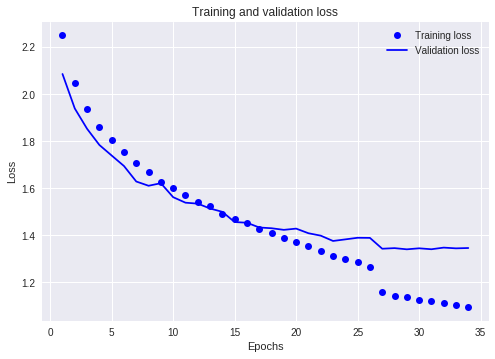

In [10]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model4.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 120us/step


[1.3319030019760132, 0.5403]

Adding Batch Normalization to each layer

In [20]:
model5 = Sequential()
model5.add(Dense(768,input_shape  = (3072,)))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))

model5.add(Dense(512, activation = 'relu'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))

model5.add(Dense(256, activation = 'relu'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))

model5.add(Dense(128, activation = 'relu'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))

model5.add(Dense(64, activation = 'relu'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))

model5.add(Dense(32, activation = 'relu'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.1))

model5.add(Dense(10, activation = 'softmax'))
opt_model = optimizers.Adam(lr=1e-4)
model5.compile(optimizer=opt_model,loss='categorical_crossentropy',metrics=['accuracy'])
model5.summary()
history5 = model5.fit(x_train, y_train, epochs=100, batch_size=32, validation_split = 0.1,callbacks=callbacks_model1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 768)               2360064   
_________________________________________________________________
batch_normalization_7 (Batch (None, 768)               3072      
_________________________________________________________________
activation_7 (Activation)    (None, 768)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               393728    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
__________

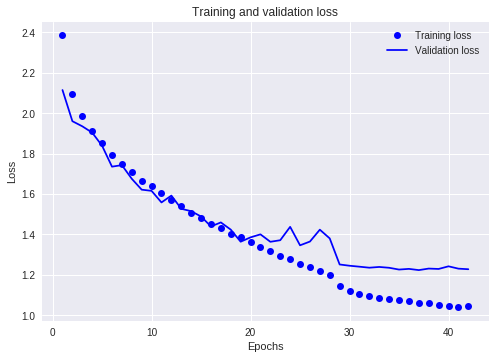

In [22]:
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model5.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 363us/step


[1.245922071647644, 0.5673]

Basic CNN Model with 2 con2d and 2 max pooling layer

In [10]:
#General CNN Model 
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))
opt_model = optimizers.Adam(lr=1e-4)
model2.compile(optimizer=opt_model,loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()
history2 = model2.fit(x_train_cifar, y_train_cifar, epochs=100, batch_size=32, validation_split = 0.1, callbacks = callbacks_model1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total para

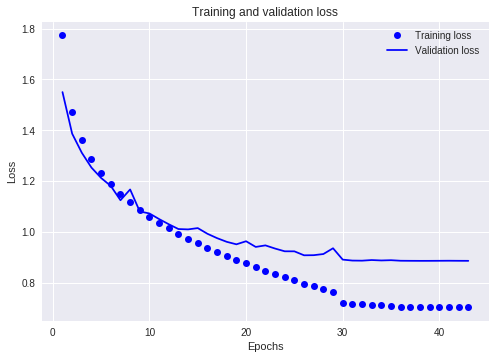

In [11]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model2.evaluate(x_test_cifar,y_test_cifar)

10000/10000 [==============================] - 6s 608us/step


[0.9079517957687377, 0.6913]

Increasing the CNN layers by 1 conv2d and 1 max pooling layer. Added dropouts to fully connected layer

In [14]:
#Adding more conv2d and Max pooling layers
model3 = Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
# model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(Dropout(0.1))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
opt_model = optimizers.Adam(lr=1e-4)
model3.compile(optimizer=opt_model,loss='categorical_crossentropy',metrics=['accuracy'])
model3.summary()
history3 = model3.fit(x_train_cifar, y_train_cifar, epochs=100, batch_size=32, validation_split = 0.1, callbacks = callbacks_model1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
__________

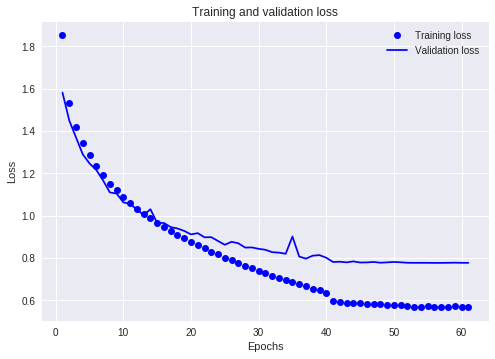

In [15]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model3.evaluate(x_test_cifar,y_test_cifar)

10000/10000 [==============================] - 7s 672us/step


[0.7878833349227905, 0.7328]

Adding Batch Normalization to fully connected layer

In [11]:
#Adding more conv2d and Max pooling layers
model7 = Sequential()
model7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
# model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model3.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Flatten())
model7.add(Dropout(0.1))

model7.add(Dense(64))
model7.add(BatchNormalization())
model7.add(Activation('relu'))
model7.add(Dropout(0.1))
           
model7.add(layers.Dense(10, activation='softmax'))
opt_model = optimizers.Adam(lr=1e-4)
model7.compile(optimizer=opt_model,loss='categorical_crossentropy',metrics=['accuracy'])
model7.summary()
history7 = model7.fit(x_train_cifar, y_train_cifar, epochs=100, batch_size=32, validation_split = 0.1, callbacks = callbacks_model1)


# model5.add(Dense(64, activation = 'relu'))
# model5.add(BatchNormalization())
# model5.add(Activation('relu'))
# model5.add(Dropout(0.1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

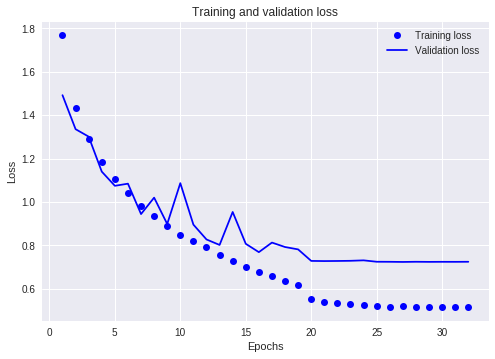

In [12]:
loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model7.evaluate(x_test_cifar,y_test_cifar)

10000/10000 [==============================] - 7s 665us/step


[0.7501526889801026, 0.7447]